# Flight Data Analysis
## by Luke DeMaster-Smith

<a id='top_of_page'></a>
## Table of Contents

- **[Preliminary Wrangling](#preliminary_wrangling)**
  - [Load and Preview Flight Data](#preliminary_wrangling_load_flight_data)
  - [Load Carrier Data](#preliminary_wrangling_load_carrier_data)
  - [Structure of Dataset](#preliminary_wrangling_structure)
  - [Main Features](#preliminary_wrangling_main_features)
  - [Features to Focus On](#preliminary_wrangling_features_to_focus_on)

- **[Univariate Exploration](#univariate_exploration)**
  - [Delay Variables - Initial Observations](#univariate_delay_initial_observations)
  - [Delay Variables - Additional Observations](#univariate_delay_additional_observations)
  - [Other Variables - Initial Observations](#univariate_otherVar_initial_observations)
  - [Univariate Summary - Distributions of Interest](#univariate_exploration_describe_distributions_of_interest)
  - [Univariate Summary - Unusual distributions and Modifications](#univariate_exploration_unusual_distributions_and_modifications)

- **[Bivariate Exploration](#bivariate_exploration)**
  - [Relationships Observed](#bivariate_exploration_relationships_observed)
  - [Unexpected Relationships](#bivariate_exploration_relationships_observed_unexpected)

- **[Multivariate Exploration](#multivariate_exploration)**
  - [Relationships Observed](#multivariate_exploration_relationships_observed)
  - [Interesting Interactions](#multivariate_exploration_relationships_observed_interesting_interactions)
  
- **[References and Dead Ends](#references_and_dead_ends)**
  - [References](#references)
  - [Dead Ends](#dead_ends)
    - [Preliminary Wrangling](#dead_ends_preliminary_wrangling)
    - [Univariate Exploration](#dead_ends_univariate_exploration)
      - [Log Scale Histograms](#dead_ends_univariate_logScale_histograms)
      - [Clean Histograms, Standard Scale, Single Variable](#dead_ends_univariate_cleanHist_singleVar_standardScale)
      - [Clean Histograms, Standard Scale, Multiple Variables](#dead_ends_univariate_cleanHist_multiVar_standardScale)
      - [Density Plots](#dead_ends_univariate_density_plot_histogram)

<a id='preliminary_wrangling'></a>
([Top of Page](#top_of_page))
## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time           # for timing operations on large dataframes

import random
random.seed(42)       # to assure any samples are the same each time the kernel is restarted

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

<a id='preliminary_wrangling_load_flight_data'></a>
([Top of Page](#top_of_page))

**Load and Preview Flight Data**

In [2]:
# load a single year's dataset into a pandas dataframe
start = time.time()
flights = pd.read_csv('2008.csv')           #flights_2008
end = time.time()

currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

time elapsed: 36.13156986236572, current time: 23:4:39


In [3]:
# high-level overview of data shape and composition
print(flights.shape)
print(flights.dtypes)

(7009728, 29)
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object


* There are over 7 million rows, and it took 36 seconds to load the csv. That is a lot of data.
* I am going to sample the data to speed up analysis and plotting.
* If my analysis leads me to some metric or plot that would clearly benefit from a larger sample size (or the whole dataframe?), I will adjust the dataframe accordingly.
* Since I primarily plan to look for trends though, I suspect a sufficiently large sample size (say..50000) will be sufficient.
* I will backup the data first, in case I need a larger sample size or the whole dataframe at some point.

In [5]:
flights_all = flights.copy(deep=True)

In [13]:
# sample 50000 flights, then display head to get a better sense of the data
random.seed(42)       # to assure any samples are the same each time the kernel is restarted
samples = np.random.choice(flights_all.shape[0], 50000, replace = False)
flights = flights_all.loc[samples,:]
flights.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
5025714,2008,9,22,1,852.0,754,949.0,845,OO,5824,...,3.0,24.0,0,NaN,0,0.0,58.0,6.0,0.0,0.0
6772890,2008,12,16,2,855.0,905,931.0,944,EV,5613,...,8.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5605409,2008,10,6,1,1516.0,1516,1751.0,1752,UA,814,...,2.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2527145,2008,5,13,2,1459.0,1312,1608.0,1429,YV,7066,...,4.0,10.0,0,NaN,0,99.0,0.0,0.0,0.0,0.0
6348436,2008,11,24,1,1754.0,1705,1901.0,1830,9E,2658,...,3.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,31.0
1961686,2008,4,6,7,1029.0,1034,1109.0,1119,OO,5940,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2194857,2008,4,7,1,1934.0,1940,2040.0,2045,MQ,4307,...,5.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6370012,2008,11,11,2,1915.0,1910,2013.0,2020,AA,855,...,3.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6572639,2008,12,10,3,NaN,2115,NaN,2242,XE,2192,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
2676402,2008,5,26,1,1431.0,1437,1444.0,1500,US,205,...,5.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


**<br>Determine which columns are not shown above, then visualize them<br><br>**

In [14]:
flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [15]:
cols_to_show = ['TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'ActualElapsedTime',
                'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance']

In [16]:
flights[cols_to_show].head(10)

,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance
5025714,N755SK,57.0,51.0,30.0,64.0,57.0,51.0,30.0,64.0,58.0,ORD,MSN,109
6772890,N977EV,96.0,99.0,76.0,-13.0,96.0,99.0,76.0,-13.0,-10.0,CVG,MEM,403
5605409,N927UA,95.0,96.0,84.0,-1.0,95.0,96.0,84.0,-1.0,0.0,DEN,DSM,589
2527145,N454YV,69.0,77.0,55.0,99.0,69.0,77.0,55.0,99.0,107.0,GJT,DEN,212
6348436,80299E,67.0,85.0,51.0,31.0,67.0,85.0,51.0,31.0,49.0,MCI,MEM,392
1961686,N706SK,40.0,45.0,28.0,-10.0,40.0,45.0,28.0,-10.0,-5.0,ASE,DEN,125
2194857,N631AE,66.0,65.0,48.0,-5.0,66.0,65.0,48.0,-5.0,-6.0,ORD,LSE,215
6370012,N5DSAA,178.0,190.0,156.0,-7.0,178.0,190.0,156.0,-7.0,5.0,DFW,SAN,1171
6572639,NaN,NaN,87.0,NaN,NaN,NaN,87.0,NaN,NaN,NaN,IAH,MAF,429
2676402,N834AW,73.0,83.0,54.0,-16.0,73.0,83.0,54.0,-16.0,-6.0,ABQ,PHX,328


In [17]:
flights.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,50000.0,50000.000000,50000.000000,50000.000000,49083.000000,50000.000000,48953.000000,50000.000000,50000.000000,48932.000000,...,50000.00000,48953.000000,49073.000000,50000.000000,50000.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000
mean,2008.0,6.373200,15.747560,3.940220,1334.867082,1327.213960,1482.583315,1496.866380,2233.582520,127.455264,...,728.58306,6.867689,16.398019,0.018660,0.002700,15.216479,3.108194,17.127089,0.083394,20.118005
std,0.0,3.406023,8.765193,1.989303,479.032551,465.454782,505.689274,482.825933,1970.604572,70.711520,...,567.99337,4.820054,11.180163,0.135322,0.051892,37.271738,19.430303,32.046665,1.746427,37.947164
min,2008.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,25.000000,...,31.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,3.000000,8.000000,2.000000,927.000000,925.000000,1106.000000,1115.000000,622.000000,77.000000,...,325.00000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,6.000000,16.000000,4.000000,1328.000000,1323.000000,1514.000000,1520.000000,1571.000000,110.000000,...,581.00000,6.000000,14.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
75%,2008.0,9.000000,23.000000,6.000000,1728.000000,1715.000000,1910.000000,1910.000000,3561.000000,157.000000,...,952.00000,8.000000,19.000000,0.000000,0.000000,16.000000,0.000000,21.000000,0.000000,26.000000
max,2008.0,12.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2400.000000,7828.000000,666.000000,...,4962.00000,83.000000,246.000000,1.000000,1.000000,1166.000000,487.000000,453.000000,78.000000,608.000000


In [18]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 5025714 to 1263446
Data columns (total 29 columns):
Year                 50000 non-null int64
Month                50000 non-null int64
DayofMonth           50000 non-null int64
DayOfWeek            50000 non-null int64
DepTime              49083 non-null float64
CRSDepTime           50000 non-null int64
ArrTime              48953 non-null float64
CRSArrTime           50000 non-null int64
UniqueCarrier        50000 non-null object
FlightNum            50000 non-null int64
TailNum              49434 non-null object
ActualElapsedTime    48932 non-null float64
CRSElapsedTime       49992 non-null float64
AirTime              48932 non-null float64
ArrDelay             48932 non-null float64
DepDelay             49083 non-null float64
Origin               50000 non-null object
Dest                 50000 non-null object
Distance             50000 non-null int64
TaxiIn               48953 non-null float64
TaxiOut              49

In [211]:
flights.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,50000.0,50000.000000,50000.000000,50000.000000,49083.000000,50000.000000,48953.000000,50000.000000,50000.000000,48932.000000,...,50000.00000,48953.000000,49073.000000,50000.000000,50000.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000
mean,2008.0,6.373200,15.747560,3.940220,1334.867082,1327.213960,1482.583315,1496.866380,2233.582520,127.455264,...,728.58306,6.867689,16.398019,0.018660,0.002700,15.216479,3.108194,17.127089,0.083394,20.118005
std,0.0,3.406023,8.765193,1.989303,479.032551,465.454782,505.689274,482.825933,1970.604572,70.711520,...,567.99337,4.820054,11.180163,0.135322,0.051892,37.271738,19.430303,32.046665,1.746427,37.947164
min,2008.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,25.000000,...,31.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,3.000000,8.000000,2.000000,927.000000,925.000000,1106.000000,1115.000000,622.000000,77.000000,...,325.00000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,6.000000,16.000000,4.000000,1328.000000,1323.000000,1514.000000,1520.000000,1571.000000,110.000000,...,581.00000,6.000000,14.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
75%,2008.0,9.000000,23.000000,6.000000,1728.000000,1715.000000,1910.000000,1910.000000,3561.000000,157.000000,...,952.00000,8.000000,19.000000,0.000000,0.000000,16.000000,0.000000,21.000000,0.000000,26.000000
max,2008.0,12.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2400.000000,7828.000000,666.000000,...,4962.00000,83.000000,246.000000,1.000000,1.000000,1166.000000,487.000000,453.000000,78.000000,608.000000


<a id='preliminary_wrangling_load_carrier_data'></a>
([Top of Page](#top_of_page))

**Load Carrier Data**

In [266]:
# load carrier codes
start = time.time()
carriers = pd.read_csv('carriers.csv')
end = time.time()

currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

time elapsed: 0.04381394386291504, current time: 22:37:38


In [267]:
carriers.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [268]:
carriers.shape

(1491, 2)

<a id='preliminary_wrangling_structure'></a>
([Top of Page](#top_of_page))
### What is the structure of your dataset?

> Your answer here!

* There are over 7 million rows in the dataset. That is a lot. I decided to sample 50000 of them in order to have a dataset that is large enough to analyze trends, but small enough to allow quick analysis and plotting.
* Most variables are numeric with type float.
* There appear to be NAN entries for some features. These rows may need to be dropped.

<a id='preliminary_wrangling_main_features'></a>
([Top of Page](#top_of_page))
### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

I am mostly interested in the flight delays and determining which features best predict the amount of delay.

<a id='preliminary_wrangling_features_to_focus_on'></a>
([Top of Page](#top_of_page))
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

I suspect that delays will be the longest during the winter months and on holidays. I also suspect that delays will be longer on the weekends, and longer at some airports than others.

<a id='univariate_exploration'></a>
([Top of Page](#top_of_page))
## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

* Here is a reference for [setting matplotlib title properties](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_title.html)

* Reference [for adding text to matplotlib plots](https://matplotlib.org/3.1.1/tutorials/text/text_intro.html)

* Reference for [adding a figure title and subplot titles](https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/figure_title.html)

**Define a function to plot multiple standard scale histograms**

In [214]:
def plot_histograms_stdAxis(flights, var, xaxis_label, numPlots, min_vals, max_vals, binsizes):
    fig, ax = plt.subplots(nrows=numPlots, figsize = [8, numPlots * 3.5])
    for i in range(numPlots):
        bin_edges = np.arange(min_vals[i], max_vals[i]+binsizes[i], binsizes[i])
        ax[i].hist(data = flights, x = var, bins = bin_edges);
        ax[i].set_title(flights[var].name + '\n' +
                        'min: ' + str(min_vals[i]) +
                        ', max: ' + str(max_vals[i]) +
                        ', binsize: ' +
                        str(binsizes[i]) + ' ',
                        pad=-30, loc='right')

    plt.xlabel(xaxis_label)
    plt.show()

In [176]:
flights.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

**Create standard scale histograms**

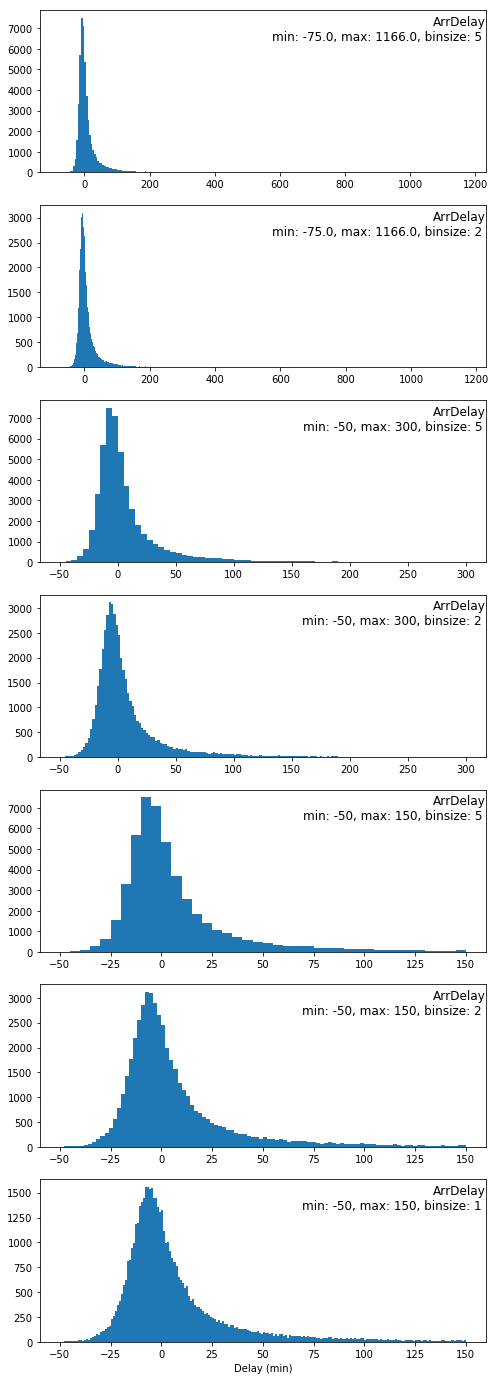

------------------------------------------------------------------------------------


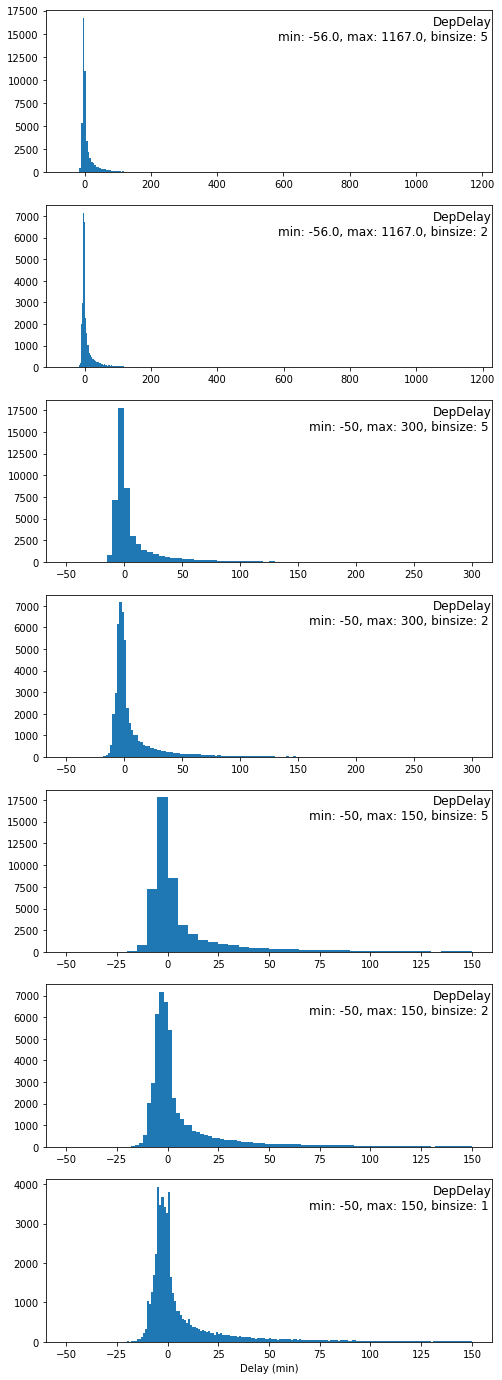

------------------------------------------------------------------------------------


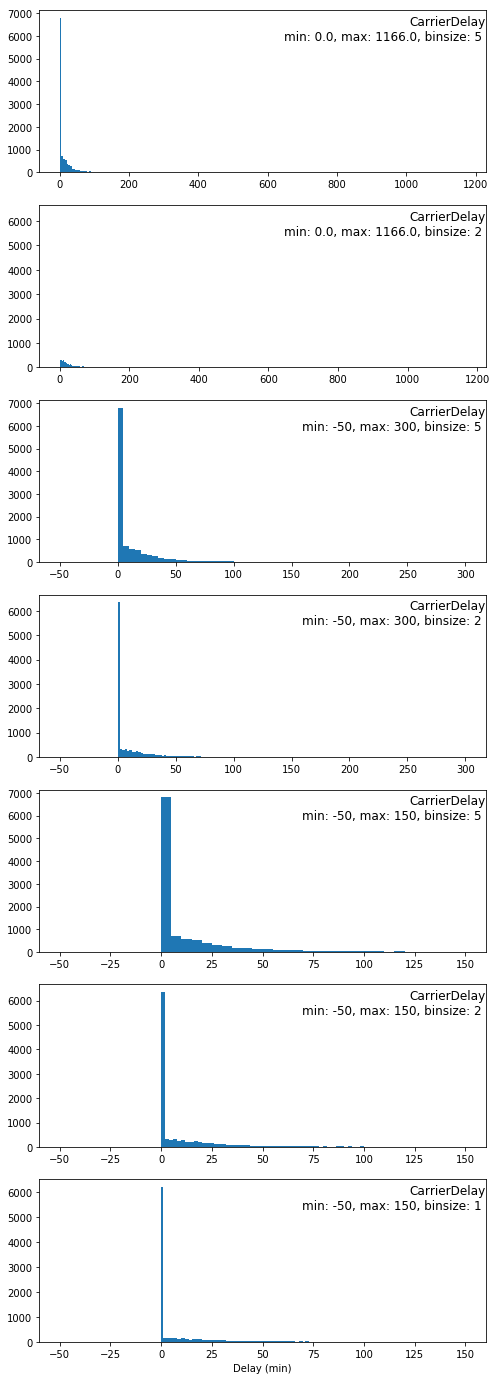

------------------------------------------------------------------------------------


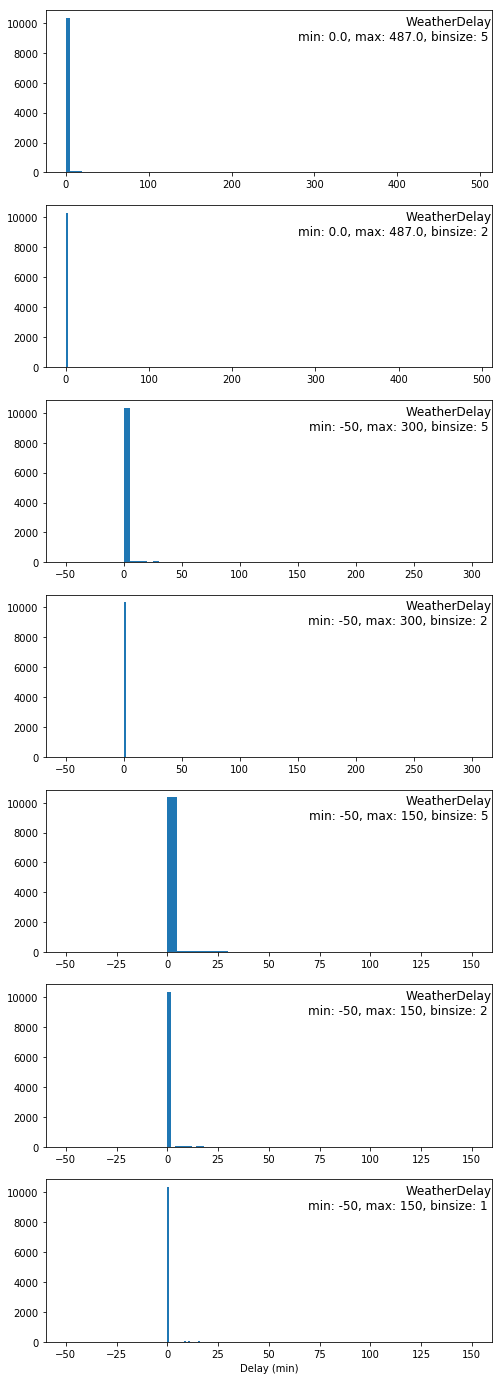

------------------------------------------------------------------------------------


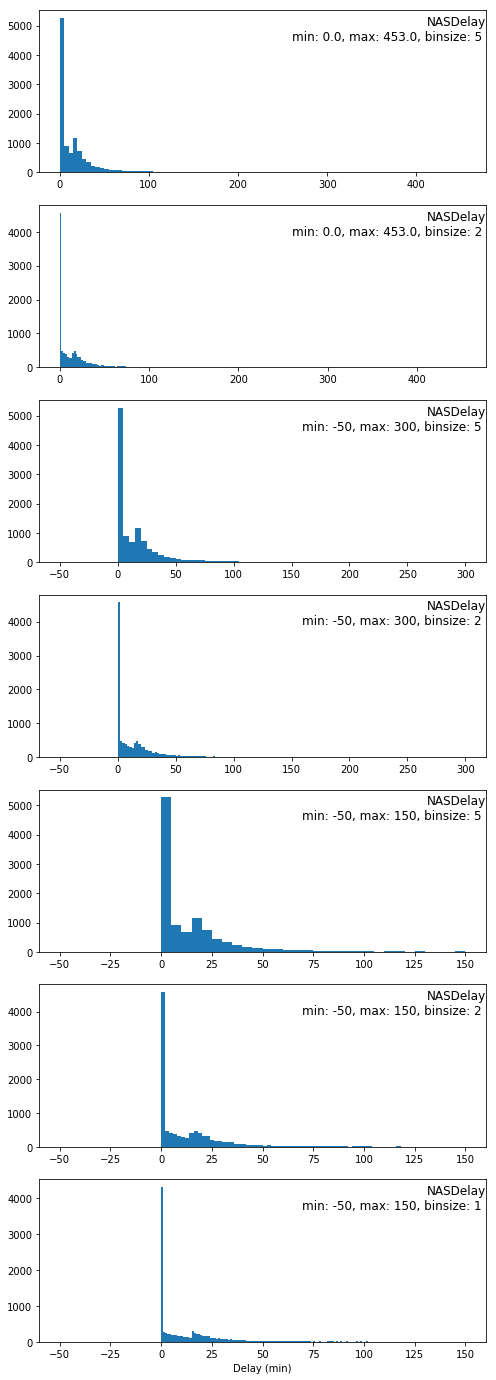

------------------------------------------------------------------------------------


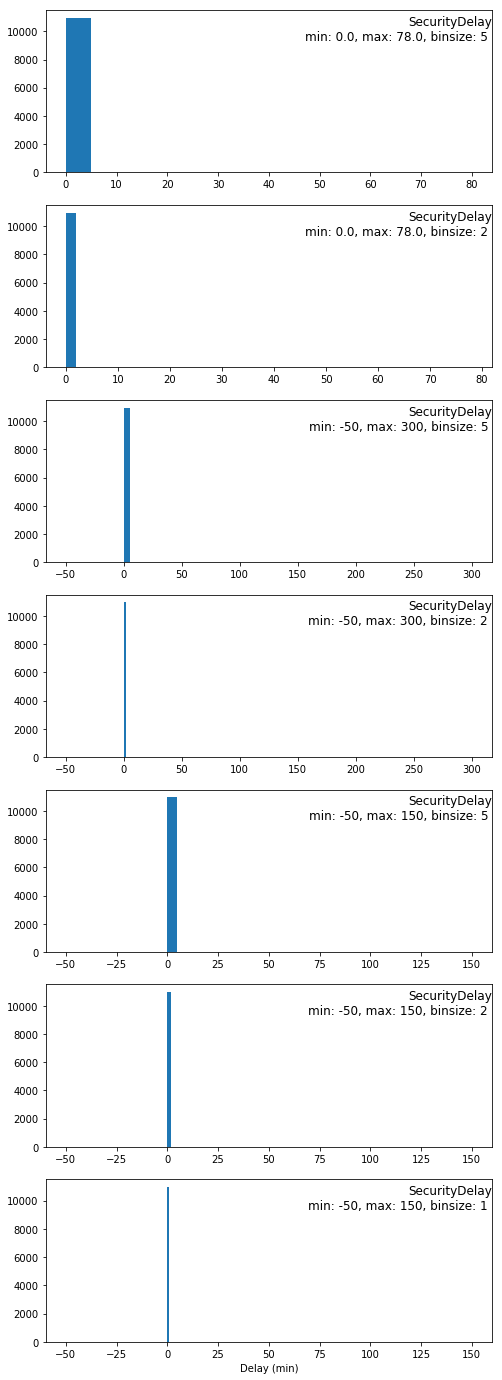

------------------------------------------------------------------------------------


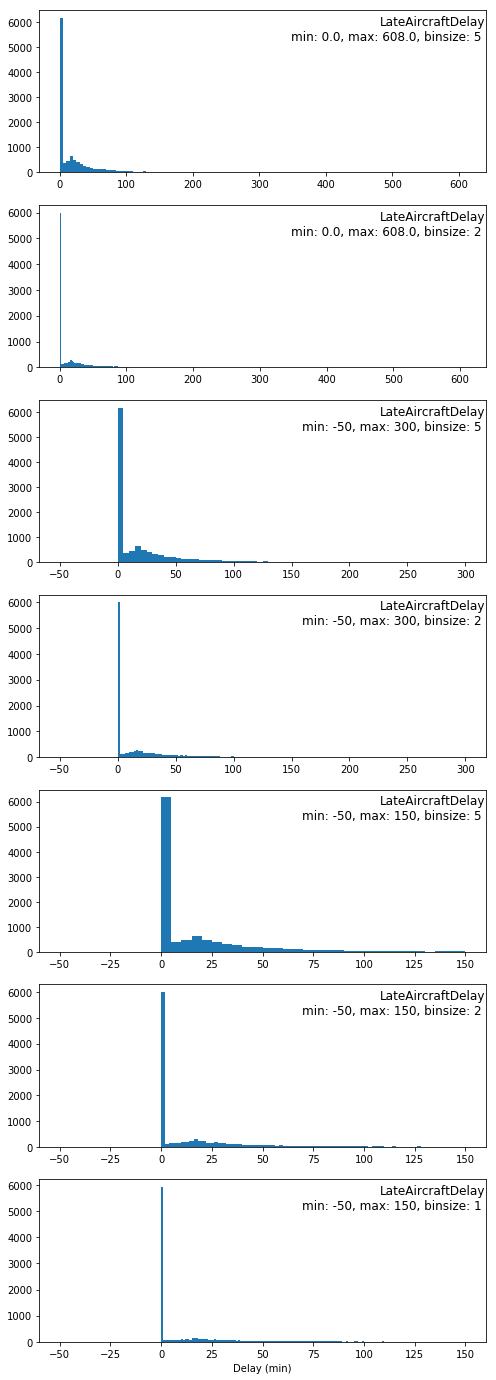

------------------------------------------------------------------------------------


In [205]:
vars = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
numPlots = 7;
for i in range(len(vars)):
    var = vars[i]
    min_values = [flights[var].min(), flights[var].min(),
                  -50, -50, -50, -50, -50]
    max_values = [flights[var].max(), flights[var].max(),
                  300, 300, 150, 150, 150]
    binsizes = [5, 2, 5, 2, 5, 2, 1]
    plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)
    print('------------------------------------------------------------------------------------')

In [210]:
print(vars)

['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


<a id='univariate_delay_initial_observations'></a>
([Top of Page](#top_of_page))<br>

**'Delay' Variables - Initial Observations**

* 'ArrDelay' and 'DepDelay' have roughly normal distributions around zero, albeit with some outliers causing a right-handed skew.
* 'CarrierDelay', 'WeatherDelay', 'NASDelay', and 'LateAircraftDelay' each have a large number of points at or very near zero. This is disguising the true nature of the distribution.
  * These distributions will have to be explored in greater detail
* 'NASDelay' seems to have bi-modal distribution, which was not expected.
  * This bears further exploration.
* 'SecurityDelay' seems to be almost uniformly zero.
  * It turns out this parameter is not _uniformly_ zero, but since it is _mostly_ zeros, this parameter is not a large driver of delays and will be ignored
* 'LateAircraftDelay' seems to have a spike in frequency around 20 minutes

**Define a function to plot multiple log scale histograms**

In [226]:
def plot_histograms_logAxis(flights, var, xaxis_label, numPlots, max_vals, log_binsizes, ticks):
    fig, ax = plt.subplots(nrows=numPlots, figsize = [8, numPlots * 3.5])
    labels = ['{}'.format(v) for v in ticks]
    for i in range(numPlots):
        #bin_edges = np.arange(min_vals[i], max_vals[i]+binsizes[i], binsizes[i])        
        #bin_edges =       np.arange(min_vals[i],            max_vals[i]+binsizes[i], binsizes[i])
        bin_edges = 10 ** np.arange(0, np.log10(max_vals[i])+log_binsizes[i], log_binsizes[i])
        ax[i].hist(data = flights, x = var, bins = bin_edges);
        ax[i].set_xscale('log')
        ax[i].xaxis.set_ticks(ticks)
        ax[i].xaxis.set_ticklabels(labels)
        ax[i].set_title(flights[var].name + '\n' +
                        'max: ' + str(max_vals[i]) +
                        ', log_binsize: ' +
                        str(log_binsizes[i]) + ' ',
                        pad=-30, loc='right')

    plt.xlabel(xaxis_label)
    plt.show()

**Create log-scale histograms of the variables that have a large number of points near zero**

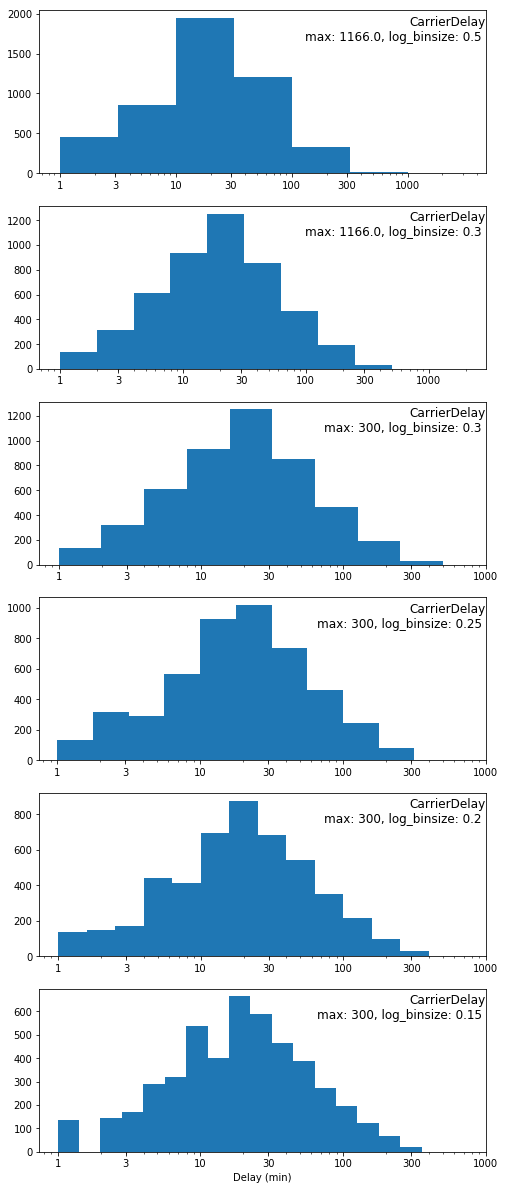

------------------------------------------------------------------------------------


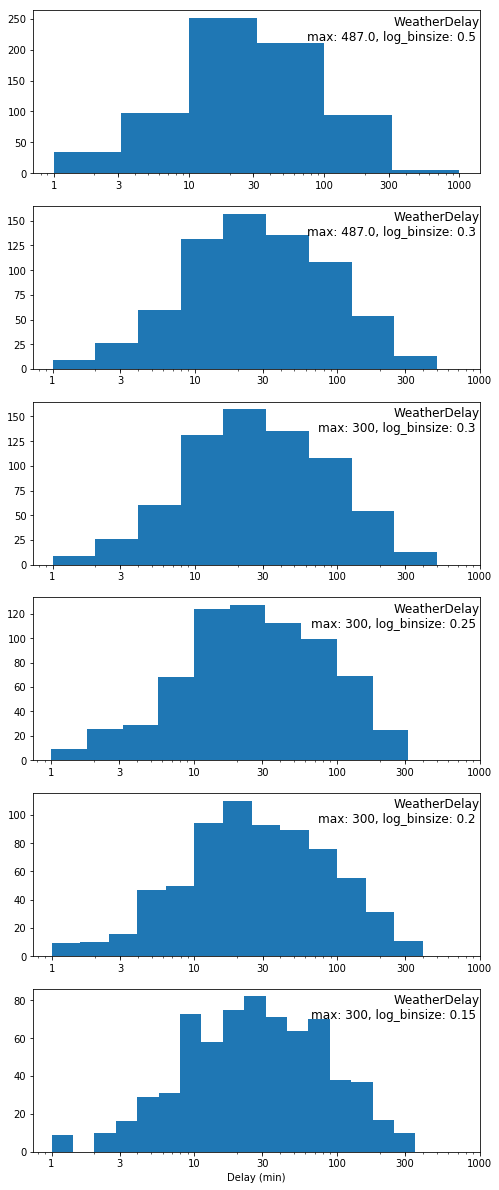

------------------------------------------------------------------------------------


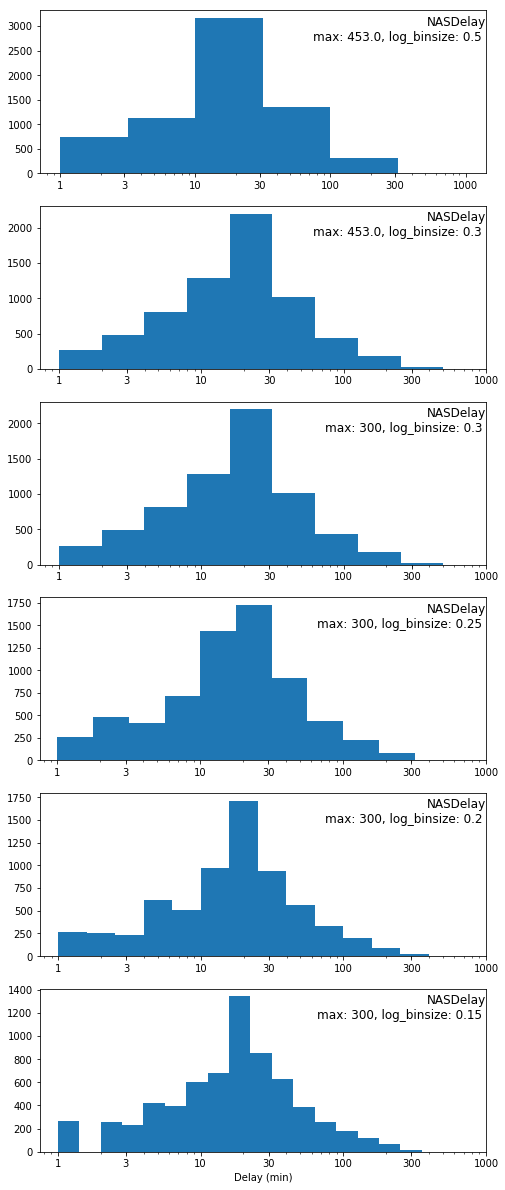

------------------------------------------------------------------------------------


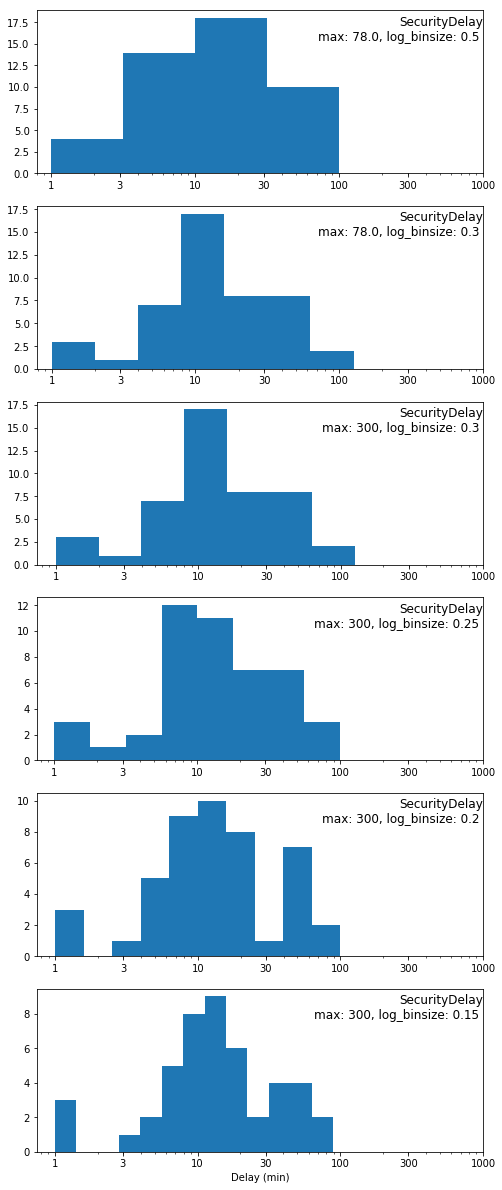

------------------------------------------------------------------------------------


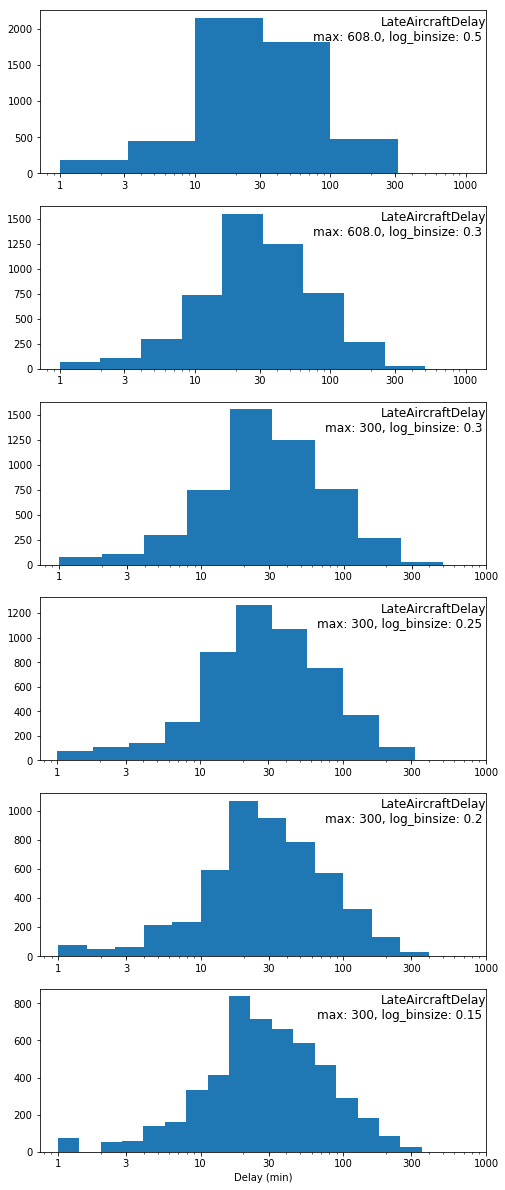

------------------------------------------------------------------------------------


In [227]:
vars = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
numPlots = 6;
for i in range(len(vars)):
    var = vars[i]
    max_values = [flights[var].max(),
                  flights[var].max(),
                  300, 300, 300, 300]
    log_binsizes = [0.5, 0.3, 0.3, 0.25, 0.2, 0.15]
    ticks = [1, 3, 10, 30, 100, 300, 1000]
    plot_histograms_logAxis(flights, var, 'Delay (min)', numPlots, max_values, log_binsizes, ticks)
    print('------------------------------------------------------------------------------------')

**Create standard scale histograms of the variables that have a large number of points near zero**
* Start these histograms at a value larger than zero

**'CarrierDelay' distribution**

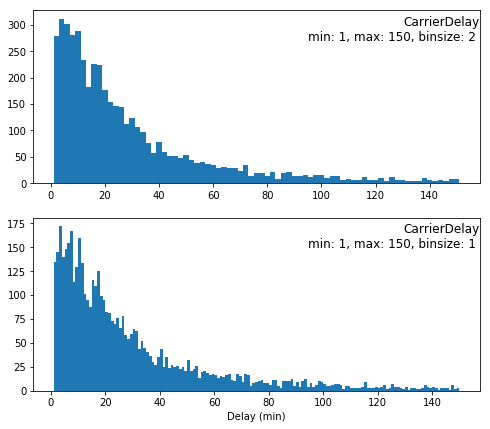

In [234]:
vars = ['CarrierDelay']
numPlots = 2;
for i in range(len(vars)):
    var = vars[i]
    min_values = [1, 1]
    max_values = [150, 150]
    binsizes = [2, 1]
    plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)

**'WeatherDelay' distribution**

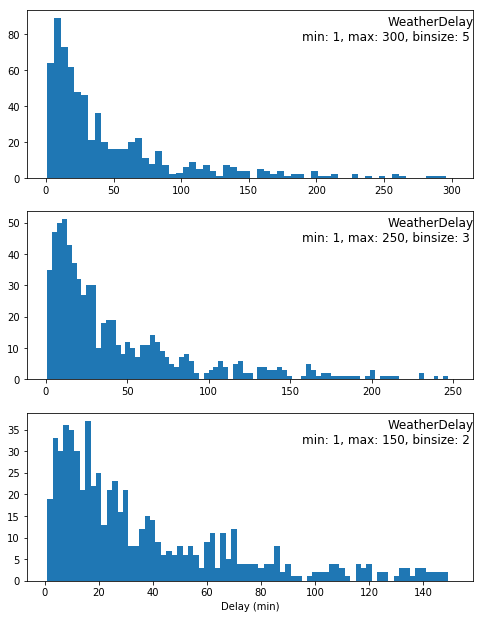

In [259]:
vars = ['WeatherDelay']
numPlots = 3;
for i in range(len(vars)):
    var = vars[i]
    min_values = [1, 1, 1]
    max_values = [300, 250, 150]
    binsizes = [5, 3, 2]
    plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)

**'NASDelay' Distribution**

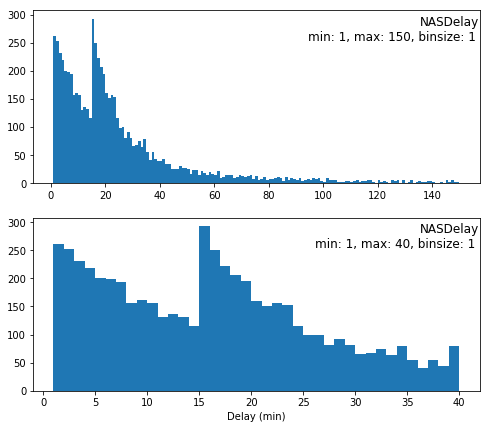

In [247]:
vars = ['NASDelay']
numPlots = 2;
for i in range(len(vars)):
    var = vars[i]
    min_values = [1, 1]
    max_values = [150, 40]
    binsizes = [1, 1]
    plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)

**'LateAircraftDelay' Distribution**

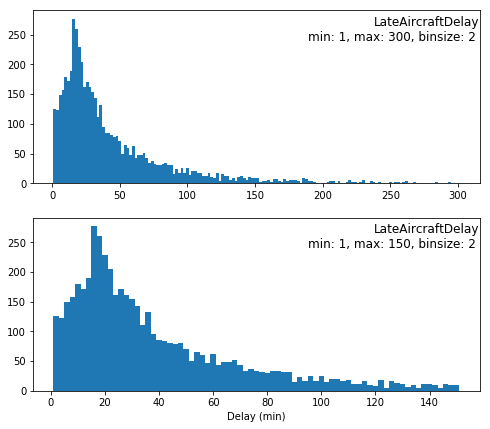

In [249]:
vars = ['LateAircraftDelay']
numPlots = 2;
for i in range(len(vars)):
    var = vars[i]
    min_values = [1, 1]
    max_values = [300, 150]
    binsizes = [2, 2]
    plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)

<a id='univariate_delay_additional_observations'></a>
([Top of Page](#top_of_page))<br>

**'Delay' Variables - Additional Observations**

* 'CarrierDelay' appears to be logarithmic
* 'WeatherDelay' appears to be roughly logarithmic as well, albeit noisier than 'CarrierDelay'
* 'NASDelay' (i.e., National Air System Delay) has a large spike in frequency at 15 minutes. This probably represents some sort of standard delay.
* 'LateAircraftDelay' has a spike at roughly 20 minutes, after which it is approximately logarithmic

**Create log scale histograms of the variables that have a large number of points near zero**

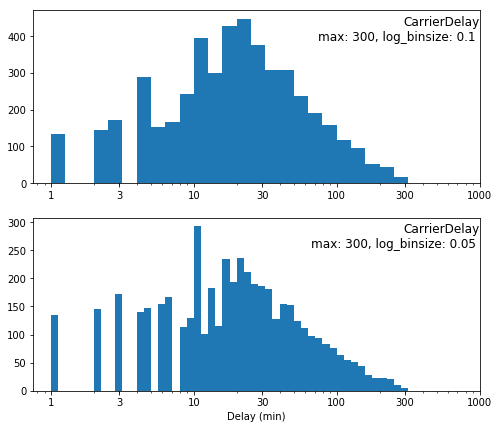

In [250]:
vars = ['CarrierDelay']
numPlots = 2;
for i in range(len(vars)):
    var = vars[i]
    max_values = [300, 300]
    log_binsizes = [0.1, 0.05]
    ticks = [1, 3, 10, 30, 100, 300, 1000]
    plot_histograms_logAxis(flights, var, 'Delay (min)', numPlots, max_values, log_binsizes, ticks)

In [ ]:
# vars = ['CarrierDelay', 'WeatherDelay', 'NASDelay',  'LateAircraftDelay']
# numPlots = 7;
# for i in range(len(vars)):
#     var = vars[i]
#     min_values = [1, 1, 1, 1, 1, 1, 1]
#     max_values = [flights[var].max(), flights[var].max(),
#                   300, 300, 150, 150, 150]
#     binsizes = [5, 2, 5, 2, 5, 2, 1]
#     plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)
#     print('------------------------------------------------------------------------------------')

**Select other variables for exploration**

In [262]:
flights.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

Numerical variables to analyze (distributions):
* Month
* DepTime
* CRSDepTime
* ArrTime
* CRSArrTime
* ActualElapsedTime
* CRSElapsedTime
* AirTime
* Distance
* TaxiIn
* TaxiOut
* Cancelled
* Diverted

Categorical variables to analyze (bar charts):
* UniqueCarrier
* Origin
* Dest
* CancellationCode

In [261]:
vars_distr = ['Month', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime',
              'CRSElapsedTime', 'AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted']

vars_categ = ['UniqueCarrier', 'Origin', 'Dest', 'CancellationCode']

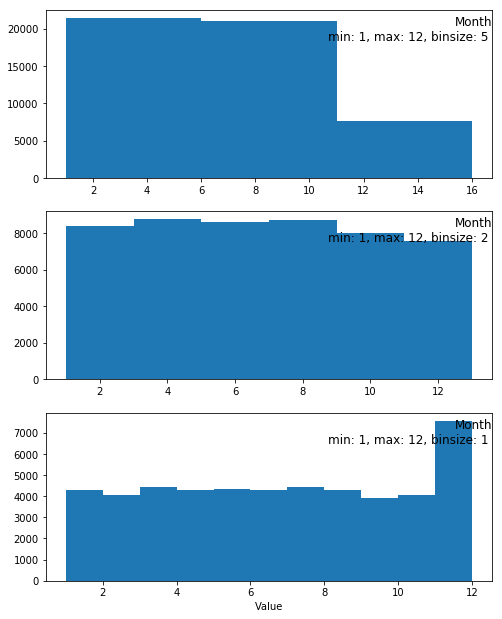

------------------------------------------------------------------------------------


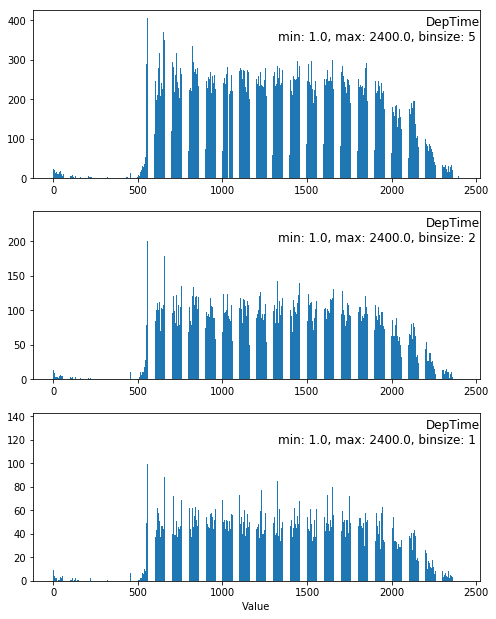

------------------------------------------------------------------------------------


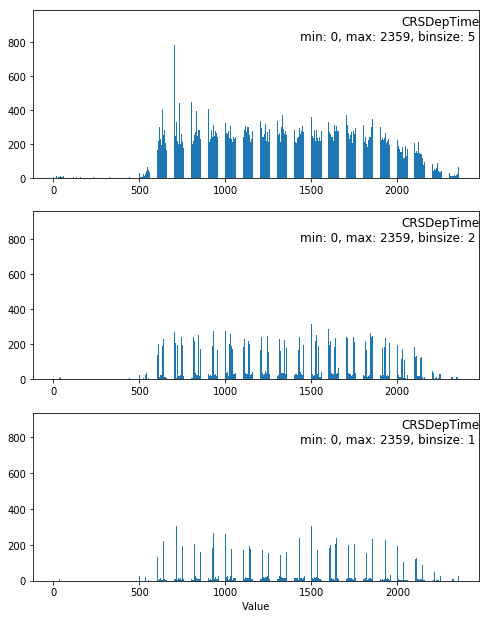

------------------------------------------------------------------------------------


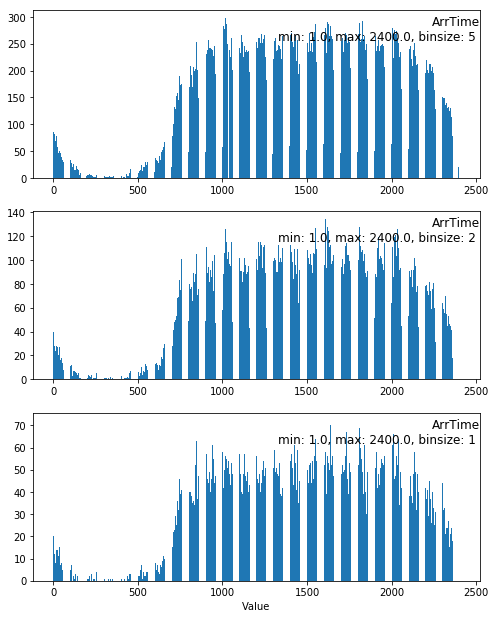

------------------------------------------------------------------------------------


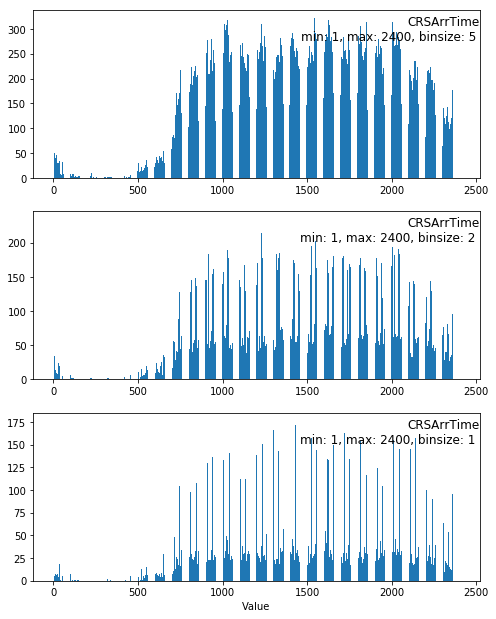

------------------------------------------------------------------------------------


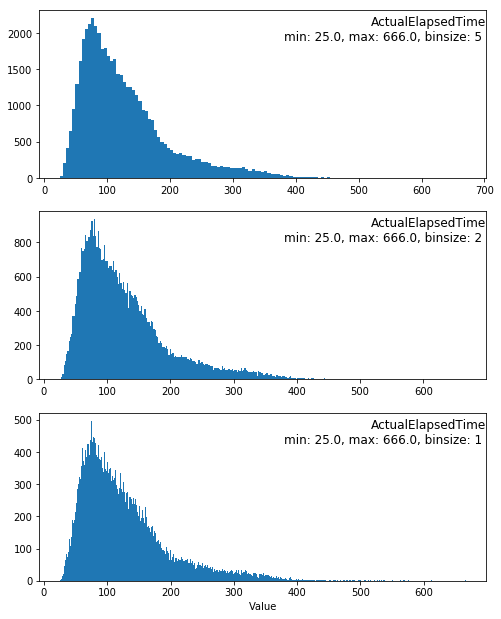

------------------------------------------------------------------------------------


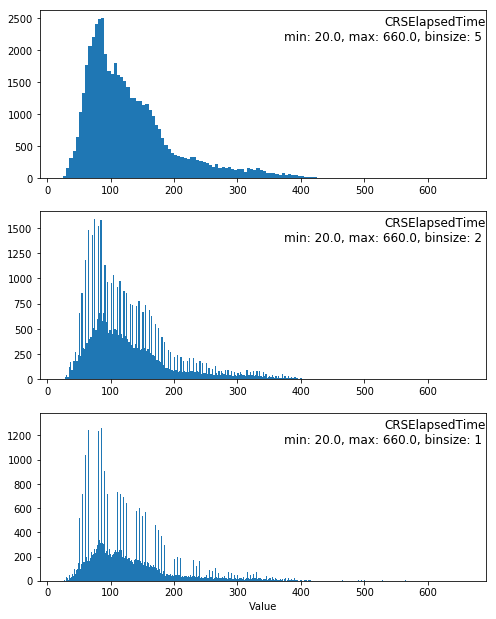

------------------------------------------------------------------------------------


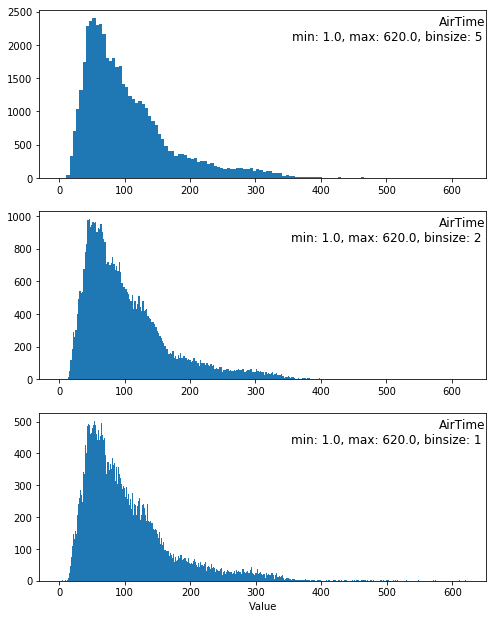

------------------------------------------------------------------------------------


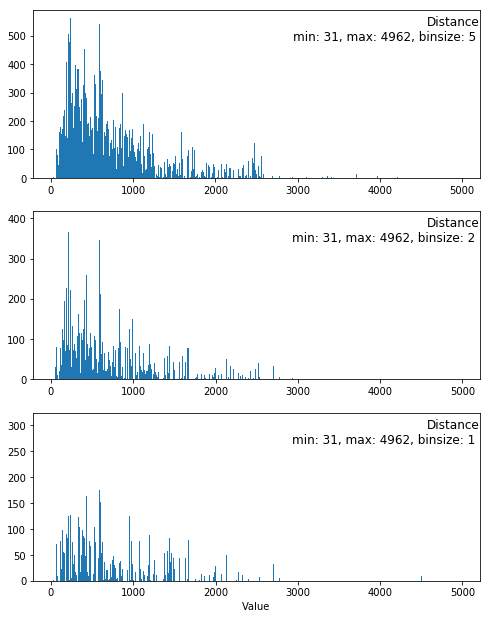

------------------------------------------------------------------------------------


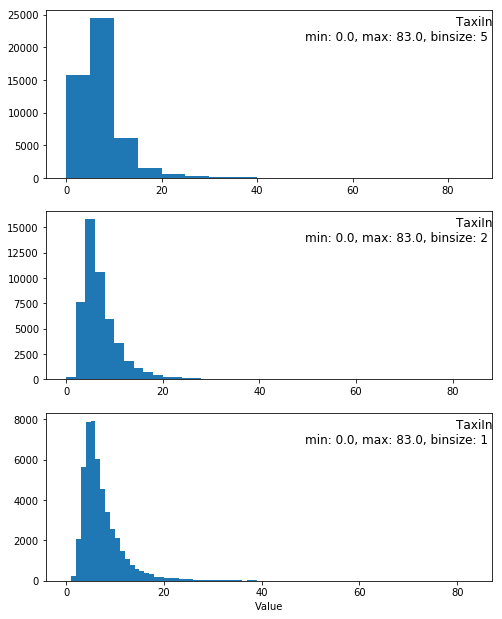

------------------------------------------------------------------------------------


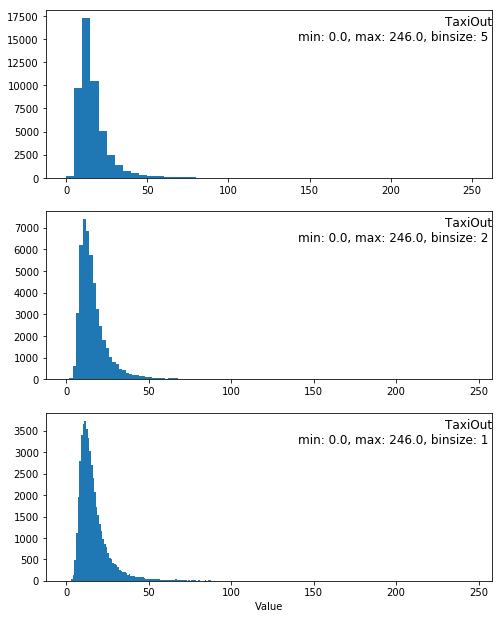

------------------------------------------------------------------------------------


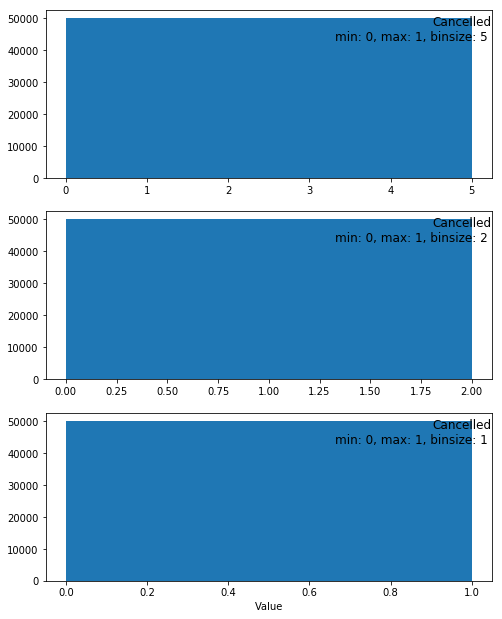

------------------------------------------------------------------------------------


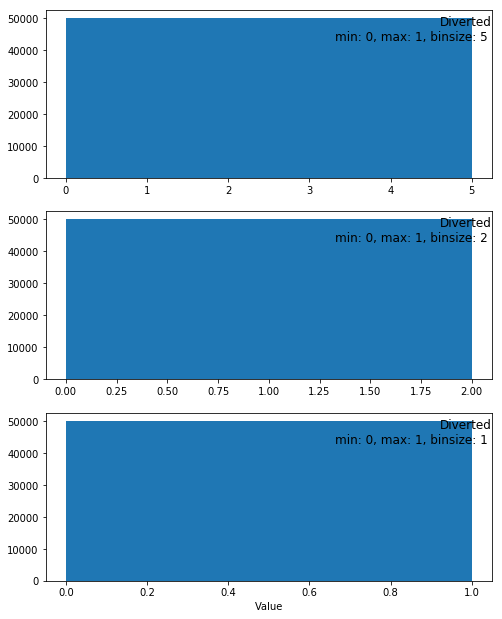

------------------------------------------------------------------------------------


In [265]:
numPlots = 3;
for i in range(len(vars_distr)):
    var = vars_distr[i]
    min_values = [flights[var].min(), flights[var].min(), flights[var].min()]
    max_values = [flights[var].max(), flights[var].max(), flights[var].max()]
    binsizes = [5, 2, 1]
    plot_histograms_stdAxis(flights, var, 'Value', numPlots, min_values, max_values, binsizes)
    print('------------------------------------------------------------------------------------')

<a id='univariate_otherVar_initial_observations'></a>
([Top of Page](#top_of_page))<br>

**Other Variables - Initial Observations**

<a id='univariate_exploration_describe_distributions_of_interest'></a>
([Top of Page](#top_of_page))
### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

<a id='univariate_exploration_unusual_distributions_and_modifications'></a>
([Top of Page](#top_of_page))
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

<a id='bivariate_exploration'></a>
([Top of Page](#top_of_page))
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

<a id='bivariate_exploration_relationships_observed'></a>
([Top of Page](#top_of_page))
### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

<a id='bivariate_exploration_relationships_observed_unexpected'></a>
([Top of Page](#top_of_page))
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

<a id='multivariate_exploration'></a>
([Top of Page](#top_of_page))
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

<a id='multivariate_exploration_relationships_observed'></a>
([Top of Page](#top_of_page))
### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

<a id='multivariate_exploration_relationships_observed_interesting_interactions'></a>
([Top of Page](#top_of_page))
### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

<a id='references_and_dead_ends'></a>
([Top of Page](#top_of_page))
# Miscellaneous References and Exploration Dead Ends

<a id='references'></a>
([Top of Page](#top_of_page))
## References

* [Types of charts](https://about.infogr.am/wp-content/uploads/2016/01/types-of-charts.jpg) - graphic scheme
* [Python Graph Gallery](https://python-graph-gallery.com), a site with hundreds of different chart types (and code samples) that can be created using Python
  * Python graph gallery - [list of possible seaborn plots](https://python-graph-gallery.com/category/seaborn/)
  * Python graph gallery - [list of possible matplotlib plots](https://python-graph-gallery.com/category/matplotlib/)

<a id='dead_ends'></a>
([Top of Page](#top_of_page))
## Dead Ends

<a id='dead_ends_preliminary_wrangling'></a>
([Top of Page](#top_of_page))
## Preliminary Wrangling

**Use chardet to detect encoding**

* NOTE:
  * this is currently an infinite loop
  * need to add a limit for when to stop reading lines if detector is not done

In [ ]:
# import chardet
# from chardet.universaldetector import UniversalDetector
# 
# detector = UniversalDetector()
# with open('2002.csv', 'rb') as f:
#     for line in f:
#         detector.feed(line)
#         if detector.done: break
# detector.close()
# 
# print(detector.result)

**Loading Multiple Years of Data**

Load in files that already have the default pandas encoding ('UTF-8')

In [207]:
# approx. 200 seconds to load

# # load multiple years into pandas dataframes
# start = time.time()
# # flights_2008 = pd.read_csv('2007.csv')
# # flights_2007 = pd.read_csv('2007.csv')
# # flights_2006 = pd.read_csv('2006.csv')
# # flights_2005 = pd.read_csv('2005.csv')
# # flights_2004 = pd.read_csv('2004.csv')
# # flights_2003 = pd.read_csv('2003.csv')
# end = time.time()
# 
# currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
# print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

**Load in files with other encodings**
* NOTE:
   * 'cp1252' may not be correct
   * 'ISO-8859-1' may actually be the proper encoding

In [ ]:
# approx. 80 seconds to load

# # load multiple years into pandas dataframes
# start = time.time()
# flights_2002 = pd.read_csv('2002.csv', encoding='cp1252')
# flights_2001 = pd.read_csv('2001.csv', encoding='cp1252')
# flights_2000 = pd.read_csv('2000.csv', encoding='cp1252')
# end = time.time()
# 
# currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
# print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

In [ ]:
# approx. 100 seconds to load

# # load multiple years into pandas dataframes
# start = time.time()
# flights_1999 = pd.read_csv('1999.csv', encoding='cp1252')
# flights_1998 = pd.read_csv('1998.csv', encoding='cp1252')
# flights_1997 = pd.read_csv('1997.csv', encoding='cp1252')
# flights_1996 = pd.read_csv('1996.csv', encoding='cp1252')
# end = time.time()
# 
# currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
# print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

In [ ]:
# approx. 85 seconds to load

# # load multiple years into pandas dataframes
# start = time.time()
# flights_1995 = pd.read_csv('1995.csv', encoding='cp1252')
# flights_1994 = pd.read_csv('1994.csv', encoding='cp1252')
# flights_1993 = pd.read_csv('1993.csv', encoding='cp1252')
# flights_1992 = pd.read_csv('1992.csv', encoding='cp1252')
# end = time.time()
# 
# currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
# print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

In [ ]:
# approx. 85 seconds to load

# # load multiple years into pandas dataframes
# start = time.time()
# flights_1991 = pd.read_csv('1991.csv', encoding='cp1252')
# flights_1990 = pd.read_csv('1990.csv', encoding='cp1252')
# flights_1989 = pd.read_csv('1989.csv', encoding='cp1252')
# flights_1988 = pd.read_csv('1988.csv', encoding='cp1252')
# flights_1987 = pd.read_csv('1987.csv', encoding='cp1252')
# end = time.time()
# 
# currTime = str(time.localtime().tm_hour) + ':' + str(time.localtime().tm_min) + ':' + str(time.localtime().tm_sec)
# print('time elapsed: ' + str(end - start) + ', current time: ' + currTime)

**Preliminary Wrangling**

In [212]:
print(flights['ArrDelay'].describe())
print('---------------------------------')
print(np.log10(flights['ArrDelay'].describe()))

count    48932.000000
mean         8.051398
std         37.248380
min        -75.000000
25%        -10.000000
50%         -2.000000
75%         12.000000
max       1166.000000
Name: ArrDelay, dtype: float64
---------------------------------
count    4.689593
mean     0.905871
std      1.571107
min           NaN
25%           NaN
50%           NaN
75%      1.079181
max      3.066699
Name: ArrDelay, dtype: float64


/anaconda3/envs/test_env_v03/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


<a id='dead_ends_univariate_exploration'></a>
([Top of Page](#top_of_page))
## Univariate Exploration

<a id='dead_ends_univariate_logScale_histograms'></a>
([Top of Page](#top_of_page))
### Log-Scale Histograms

Multi-histogram template for when there's a long tail in a variable's distribution

In [206]:
# fig, ax = plt.subplots(nrows=6, figsize = [8,20])
# 
# max_values = [flights['ArrDelay'].max(),
#               flights['ArrDelay'].max(),
#               300, 300, 300, 300]
# log_binsizes = [0.5, 0.3, 0.3, 0.25, 0.2, 0.15]
# ticks = [1, 3, 10, 30, 100, 300, 1000]
# labels = ['{}'.format(v) for v in ticks]
# for i in range(len(max_values)):
#     bin_edges = 10 ** np.arange(0, np.log10(max_values[i])+log_binsizes[i], log_binsizes[i])
#     ax[i].hist(data = flights, x = 'ArrDelay', bins = bin_edges);
#     ax[i].set_xscale('log')
#     ax[i].xaxis.set_ticks(ticks)
#     ax[i].xaxis.set_ticklabels(labels)
#     ax[i].set_title('max: ' + str(max_values[i]) +
#                     ', log_binsize: ' + 
#                     str(log_binsizes[i]) + ' ',
#                     pad=-20, loc='right')
# 
# plt.xlabel('Arrival Delay (min)')
# plt.show()

<a id='dead_ends_univariate_cleanHist_singleVar_standardScale'></a>
([Top of Page](#top_of_page))
### Clean Histograms, Single Variable, Standard Scale

Create clean histograms for 'ArrDelay' and 'DepDelay' only

In [ ]:
# var = 'ArrDelay'
# numPlots = 6
# min_values = [flights[var].min(), flights[var].min(),
#               -50, -50, -50, -50]
# max_values = [flights[var].max(), flights[var].max(),
#               150, 150, 150, 150]
# binsizes = [10, 5, 10, 5, 3, 1]
# plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)

In [ ]:
# var = 'DepDelay'
# numPlots = 7
# min_values = [flights[var].min(), flights[var].min(),
#               -20, -20, -20, -20, -20]
# max_values = [flights[var].max(), flights[var].max(),
#               150, 150, 150, 150, 50]
# binsizes = [10, 5, 10, 5, 3, 1, 1]
# plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)

<a id='dead_ends_univariate_cleanHist_multiVar_standardScale'></a>
([Top of Page](#top_of_page))
### Clean Histograms, Multiple Variables, Standard Scale

In [ ]:
# vars = ['CarrierDelay', 'WeatherDelay', 'NASDelay',  'LateAircraftDelay']
# numPlots = 7;
# for i in range(len(vars)):
#     var = vars[i]
#     min_values = [1, 1, 1, 1, 1, 1, 1]
#     max_values = [flights[var].max(), flights[var].max(),
#                   300, 300, 150, 150, 150]
#     binsizes = [5, 2, 5, 2, 5, 2, 1]
#     plot_histograms_stdAxis(flights, var, 'Delay (min)', numPlots, min_values, max_values, binsizes)
#     print('------------------------------------------------------------------------------------')

<a id='dead_ends_univariate_density_plot_histogram'></a>
([Top of Page](#top_of_page))
### Density Plot Histogram

In [ ]:
# df_temp = flights.copy(deep=True)
# df_temp['ArrDelay'] = df_temp['ArrDelay'].fillna(0).astype(np.int64)
# 
# sb.distplot(df_temp['ArrDelay']);